# Chapter 3: Masses and centroids

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the data
data_path = "../data/readers.xls"
df = pd.read_excel(data_path, index_col=0)
print(df)

    C1  C2  C3
E1   5   7   2
E2  18  46  20
E3  19  29  39
E4  12  40  49
E5   3   7  16


In [3]:
# Calculate row profiles (normalizing rows to sum to 1)
table_pro = df.div(df.sum(axis=1), axis=0)
print(table_pro)

          C1        C2        C3
E1  0.357143  0.500000  0.142857
E2  0.214286  0.547619  0.238095
E3  0.218391  0.333333  0.448276
E4  0.118812  0.396040  0.485149
E5  0.115385  0.269231  0.615385


In [4]:
# Calculate the x and y coordinates for the triangular plot
table_x = 1 - table_pro['C1'] - table_pro['C3'] / 2
table_y = table_pro['C3'] * np.sqrt(3) / 2

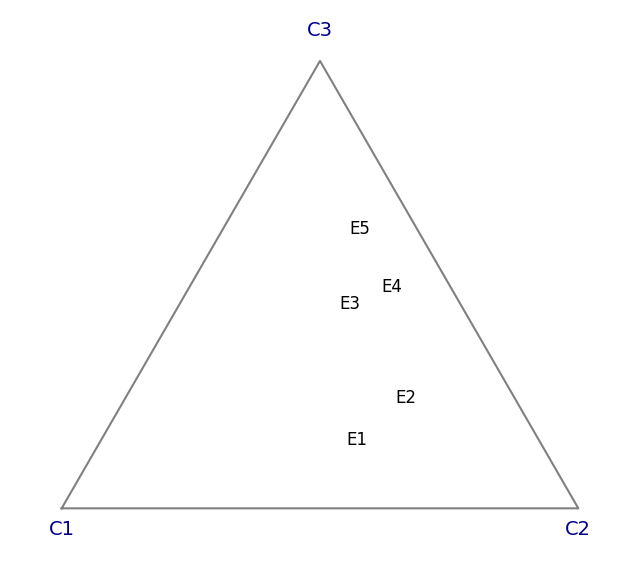

In [5]:
# Create the triangular boundary
plt.figure(figsize=(8, 8))
plt.plot([0, 1, 0.5, 0], [0, 0, np.sqrt(3) / 2, 0], color='gray')

# Add labels for the triangle vertices (C1, C2, C3) with slight offset and color differentiation
plt.text(0, -0.05, 'C1', ha='center', fontsize=14, color='darkblue')
plt.text(1, -0.05, 'C2', ha='center', fontsize=14, color='darkblue')
plt.text(0.5, np.sqrt(3) / 2 + 0.05, 'C3', ha='center', fontsize=14, color='darkblue')

# Plot the points for the educational levels and label them
for i, label in enumerate(df.index):
    plt.text(table_x.iloc[i], table_y.iloc[i], label, ha='center', fontsize=12, color='black')

# Set axis limits and hide the axes
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, np.sqrt(3) / 2 + 0.1)
plt.axis('off')

# Ensure equal aspect ratio for the triangle
plt.gca().set_aspect('equal')

# Set the title of the plot
# plt.title('Triangular Plot of Educational Levels')

# Show the plot
plt.show()